# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Kaggle Titanic DataSet**
>
>This dataset was one of the first I worked on and today I feel able to explore it better and with more techniques.
>
>Extension: .csv
>
>Source: https://www.kaggle.com/azeembootwala/titanic
>
>Date: 01-02-2022
>
> **Main Skills of this project:** 
> - **Data Preparation**
> - **Data Cleansing**  
> - **Data Wrangling**  
> - Data pre-processing
> - Exploratory Data Analysis (EAD)
> - Data Visualization

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing DataSet
- pandas.read_csv — pandas 1.3.5 documentation (pydata.org)

In [2]:
path = r"C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Titanic\titanic_preprocessed.csv"
df = pd.read_csv(path, sep =',')

In [3]:
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.0,3.0,22.0,1.0,0.0,7.2500,male,S
1,1.0,1.0,38.0,1.0,0.0,71.2833,female,C
2,1.0,3.0,26.0,0.0,0.0,7.9250,female,S
3,1.0,1.0,35.0,1.0,0.0,53.1000,female,S
4,0.0,3.0,35.0,0.0,0.0,8.0500,male,S
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,male,S
887,1.0,1.0,19.0,0.0,0.0,30.0000,female,S
888,0.0,3.0,20.0,1.0,2.0,23.4500,female,S
889,1.0,1.0,26.0,0.0,0.0,30.0000,male,C


> - Embarked indicates the city in which they boarded.  
> It is not needed for the M.L. 

In [4]:
df.drop('Embarked', axis=1, inplace=True)

> Sex must be converted to numeric variable

## Using One Hot Encoder

In [5]:
df_cat = df[['Sex']]
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
df_cat = onehotencoder.fit_transform(df_cat).toarray()

df_cat = pd.DataFrame(df_cat)

df = pd.concat([df, df_cat], axis = 1)

In [6]:
df.drop('Sex', axis=1, inplace=True)

In [7]:
df_names = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female', 'Male']
df.columns = df_names

In [8]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0
888,0.0,3.0,20.0,1.0,2.0,23.4500,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0


# Are ther any collinearity?

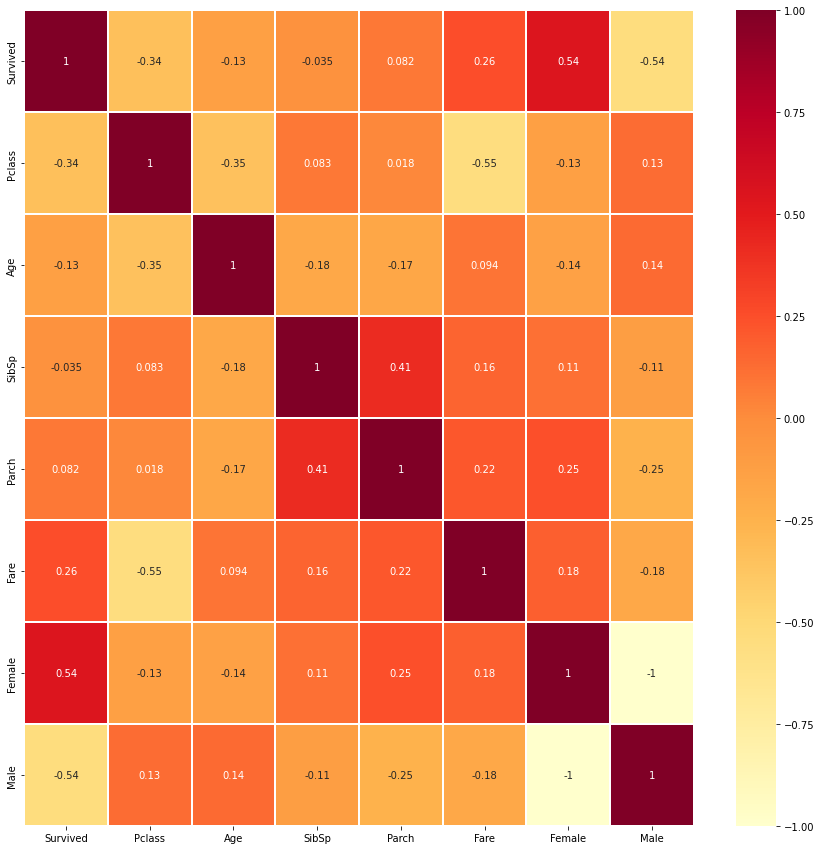

In [9]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, cmap = "YlOrRd", linewidths=0.1, annot = True);

In [10]:
correlations = df.corr()['Survived'].sort_values()
correlations

Male       -0.543351
Pclass     -0.338481
Age        -0.126637
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Female      0.543351
Survived    1.000000
Name: Survived, dtype: float64

In [11]:
df.drop('Parch', axis=1, inplace=True) # Different results are obtained when deciding whether or not to eliminate this variable.

In [12]:
df.drop('SibSp', axis=1, inplace=True) # Different results are obtained when deciding whether or not to eliminate this variable.

In [13]:
# df.drop('Fare', axis=1, inplace=True) # Different results are obtained when deciding whether or not to eliminate this variable.

> **Ther are no strong collinearity**

# Balancing the data

In [14]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

## SMOTE

In [15]:
y = df['Survived']
X = df.drop('Survived', axis=1)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority') # not majority
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

# Separating Training and Testing variables

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_sm)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
%%capture
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

In [20]:
y_pred = logistic.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.8303030303030303

In [23]:
from sklearn.metrics import confusion_matrix

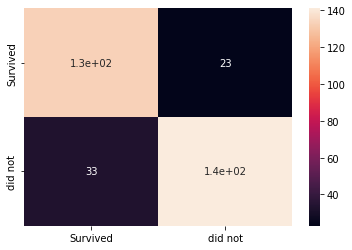

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,  xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [26]:
precision_score(y_test, y_pred)

0.8597560975609756

In [27]:
recall_score(y_test, y_pred)

0.8103448275862069

In [28]:
f1_score(y_test, y_pred, average='macro')

0.830203241574479

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       156
         1.0       0.86      0.81      0.83       174

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion = 'gini', random_state=0, splitter = 'best', max_depth = 10, max_leaf_nodes = None, ccp_alpha=0.015)

In [82]:
clf = clf.fit(X_train, y_train)

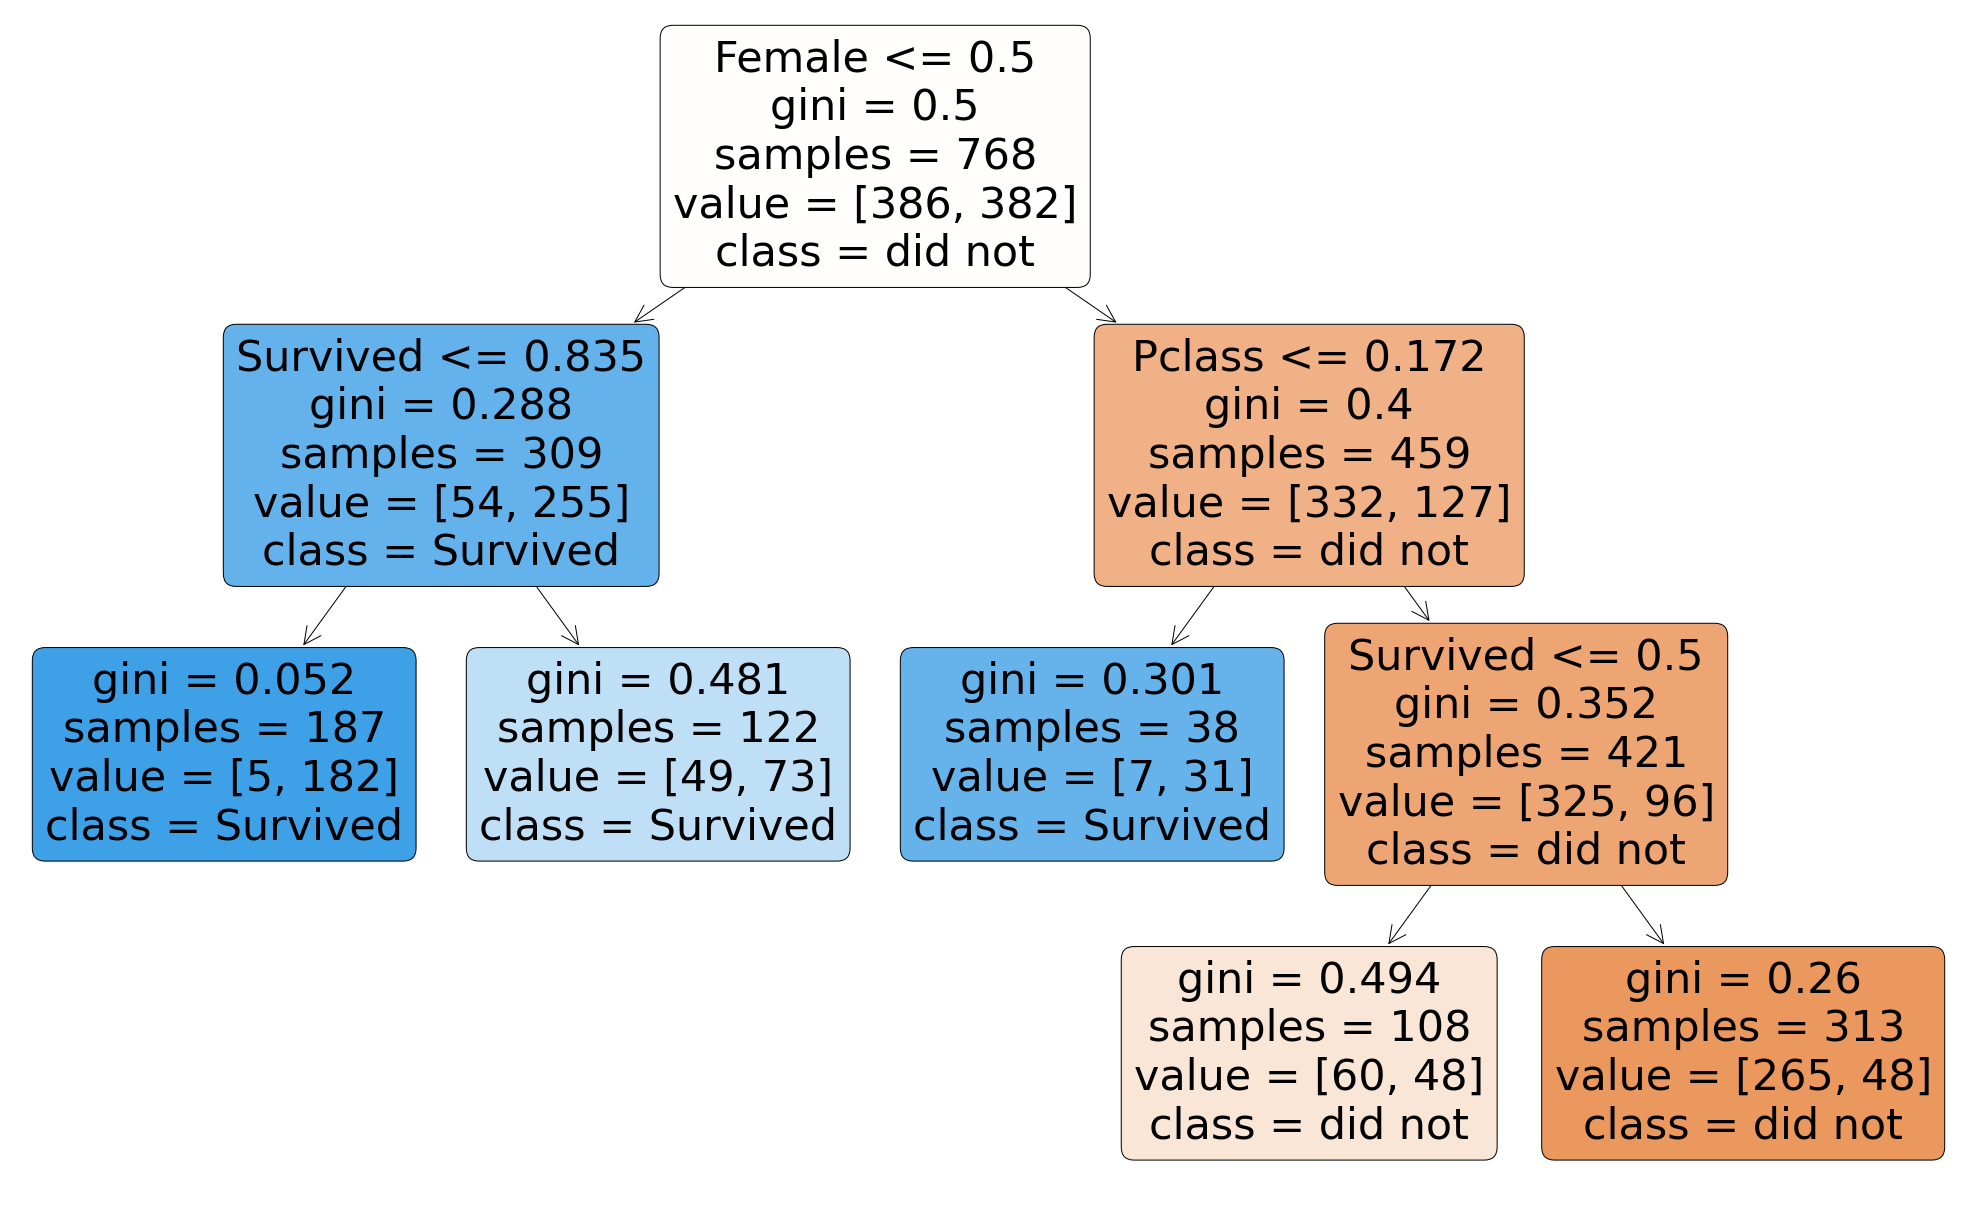

In [83]:
plt.figure(figsize=[35,22])
tree = tree.plot_tree(clf, filled = True, rounded = True, class_names = ["did not", "Survived"], feature_names = df.columns)

In [84]:
path = clf.cost_complexity_pruning_path(X_train, y_train) # determine value for alpha
ccp_alphas = path.ccp_alphas # extract diferent values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini', random_state=0, splitter = 'best', max_depth = 10, max_leaf_nodes = None, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clf_dts.append(clf)

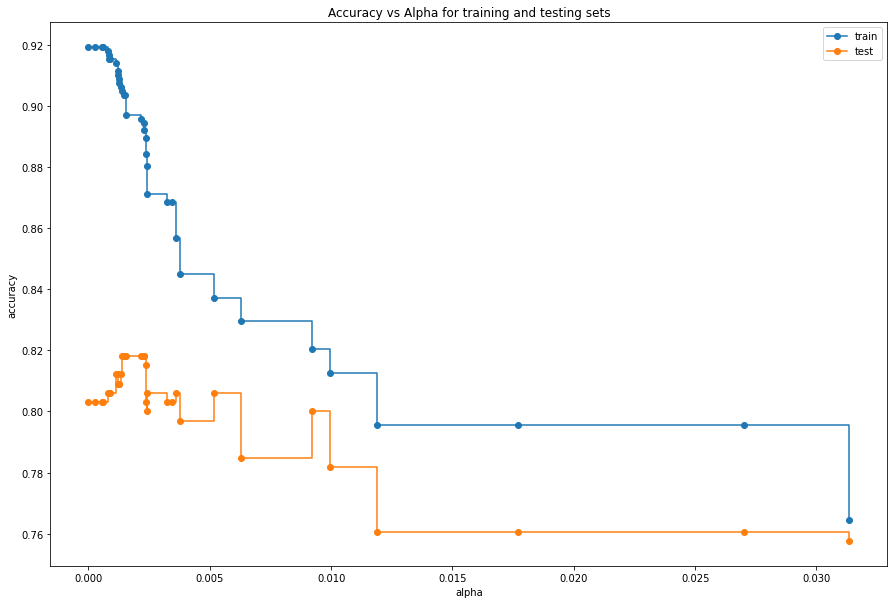

In [85]:
train_scores = [clf.score(X_train, y_train) for clf in clf_dts]
test_scores = [clf.score(X_test, y_test) for clf in clf_dts]

fig, ax = plt.subplots(figsize=[15,10]) 
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

> This Decision Tree was generated to support Random Forest  
> Parameter settings

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
%%capture
forest = RandomForestClassifier(n_estimators = 250, criterion = 'gini', random_state=0, max_depth = 10, max_leaf_nodes = None, ccp_alpha=0.015) # padrão = 100 arvores
forest.fit(X_train, y_train)

In [100]:
y_pred = forest.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.7575757575757576

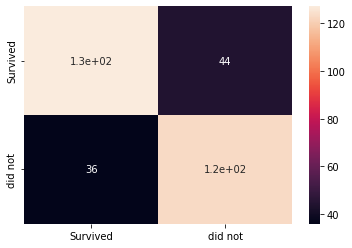

In [102]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#:~:text=sklearn.metrics.confusion_matrix%28y_true%2C%20y_pred%2C%20%2A%2C%20labels%3DNone%2C%20sample_weight%3DNone%2C%20normalize%3DNone%29%20%5Bsource%5D%20%C2%B6,i%20and%20predicted%20to%20be%20in%20group%20j.
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       163
         1.0       0.77      0.74      0.75       167

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



# Support Vector Machine

In [104]:
from sklearn.svm import SVC
model = SVC(C=10, kernel='rbf')

In [105]:
model.fit(X_train, y_train)

SVC(C=10)

In [106]:
model.score(X_test, y_test)

0.7878787878787878

# Transforming Data to Better Perform on Neural Network

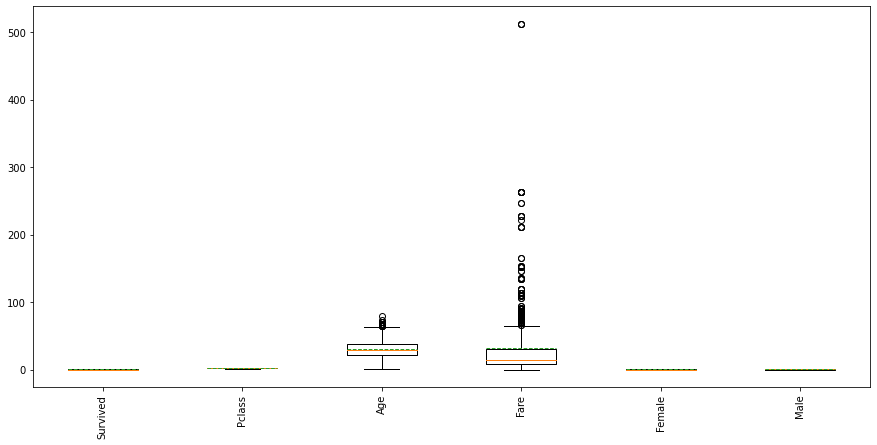

In [107]:
plt.figure(figsize=(15, 7))
plt.boxplot(df, showmeans= True, labels=df.columns.values, meanline=True, vert = True)
plt.xticks(rotation=90)
plt.show()

In [108]:
df_standardized = df.copy() # Creating a DF to be trasformed

In [109]:
lista_atributos = df.columns.values

for atributo in lista_atributos:
    lista_val = []
    maximo = np.max(abs(df_standardized[atributo]))
    for valor in df_standardized[atributo]:
        lista_val.append(valor / maximo)
    
    df_standardized[atributo] = lista_val
    pd.DataFrame(df_standardized)  

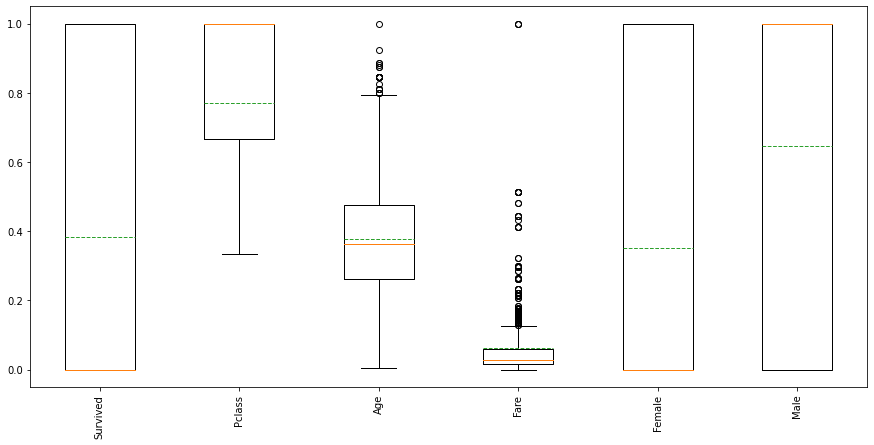

In [110]:
plt.figure(figsize=(15, 7))
plt.boxplot(df_standardized, showmeans= True, labels=df.columns.values, meanline=True, vert = True)
plt.xticks(rotation=90)
plt.show()

In [111]:
df_standardized['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [112]:
#SMOTE
y = df_standardized['Survived']
X = df_standardized.drop('Survived', axis=1)

smote = SMOTE(sampling_strategy='minority') # not majority
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

In [113]:
# Separating Test Train
scaler = MinMaxScaler()
X = scaler.fit_transform(X_sm)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3)

## Artificial Neural Network

In [114]:
import tensorflow as tf

In [115]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 5, activation='relu', input_shape=(5,)))
rede_neural.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [116]:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [117]:
rede_neural.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [118]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 832us/step - loss: 0.6895 - accuracy: 0.5352
Epoch 2/200
24/24 [==============================] - 0s 821us/step - loss: 0.6841 - accuracy: 0.6315
Epoch 3/200
24/24 [==============================] - 0s 798us/step - loss: 0.6771 - accuracy: 0.6940
Epoch 4/200
24/24 [==============================] - 0s 709us/step - loss: 0.6686 - accuracy: 0.7083
Epoch 5/200
24/24 [==============================] - 0s 990us/step - loss: 0.6580 - accuracy: 0.7148
Epoch 6/200
24/24 [==============================] - 0s 868us/step - loss: 0.6466 - accuracy: 0.7305
Epoch 7/200
24/24 [==============================] - 0s 900us/step - loss: 0.6359 - accuracy: 0.7604
Epoch 8/200
24/24 [==============================] - 0s 821us/step - loss: 0.6269 - accuracy: 0.7617
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.7617
Epoch 10/200
24/24 [==============================] - 0s 808us/step - loss: 0.6141 - accuracy

24/24 [==============================] - 0s 798us/step - loss: 0.5116 - accuracy: 0.7839
Epoch 82/200
24/24 [==============================] - 0s 787us/step - loss: 0.5119 - accuracy: 0.7826
Epoch 83/200
24/24 [==============================] - 0s 764us/step - loss: 0.5110 - accuracy: 0.7865
Epoch 84/200
24/24 [==============================] - 0s 894us/step - loss: 0.5117 - accuracy: 0.7826
Epoch 85/200
24/24 [==============================] - 0s 865us/step - loss: 0.5112 - accuracy: 0.7852
Epoch 86/200
24/24 [==============================] - 0s 349us/step - loss: 0.5110 - accuracy: 0.7826
Epoch 87/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7865
Epoch 88/200
24/24 [==============================] - 0s 707us/step - loss: 0.5098 - accuracy: 0.7852
Epoch 89/200
24/24 [==============================] - 0s 224us/step - loss: 0.5108 - accuracy: 0.7826
Epoch 90/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.78

24/24 [==============================] - 0s 760us/step - loss: 0.5048 - accuracy: 0.7786
Epoch 161/200
24/24 [==============================] - 0s 756us/step - loss: 0.5040 - accuracy: 0.7852
Epoch 162/200
24/24 [==============================] - 0s 519us/step - loss: 0.5052 - accuracy: 0.7826
Epoch 163/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5042 - accuracy: 0.7852
Epoch 164/200
24/24 [==============================] - 0s 826us/step - loss: 0.5052 - accuracy: 0.7812
Epoch 165/200
24/24 [==============================] - 0s 872us/step - loss: 0.5036 - accuracy: 0.7826
Epoch 166/200
24/24 [==============================] - 0s 863us/step - loss: 0.5041 - accuracy: 0.7812
Epoch 167/200
24/24 [==============================] - 0s 889us/step - loss: 0.5040 - accuracy: 0.7799
Epoch 168/200
24/24 [==============================] - 0s 634us/step - loss: 0.5041 - accuracy: 0.7812
Epoch 169/200
24/24 [==============================] - 0s 1ms/step - loss: 0.5041 - accur

In [119]:
y_pred = rede_neural.predict(X_test)
y_pred = (y_pred >= 0.4)

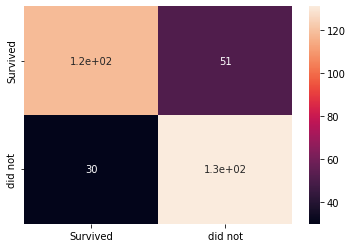

In [120]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels = ["Survived", "did not"], yticklabels = ["Survived", "did not"])
plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.77       163
         1.0       0.78      0.75      0.77       167

    accuracy                           0.77       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.77      0.77      0.77       330



> Four methods of Machine Learning were explored and one of Neural Networks.  
> Of all of them, the one that presented the best accuracy was Randon Forest with 82% accuracy.